In [1]:
!pip3 install image

import ResultsInspectors.ga_inspector as gai
import ResultsInspectors.bo_inspector as boi
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import image

from IPython import display
import pylab as pl
import numpy as np
import pandas as pd
import os

import pandas as pd
import numpy as np
from scipy.stats import ttest_ind_from_stats
from statistics import mean
from statistics import stdev
import ast
from collections import defaultdict

accuracies = dict()
testbed = 'Scalability Experiments/'
results_directory = 'Final Results (Random Initial State)/' + testbed


In [2]:
def BO_Plotter(directory_name, holdplot, name, e, linestyle, marker, color, plotDataPoints, fontsize):
    maxs = []
    test = []
    D = [0]*1000
    
    results = boi.read_files(results_directory + directory_name)
        
    accuracies[directory_name] = []
    
    if directory_name == 'BO (15-0.25)':
            D = D

    else:
        for index, result in enumerate(results):
            
            data = [100 - p for p in result.perfs]
            accuracies[directory_name].append(max(data))
            maxs.append(max(data))
            data = list(data)
            n_calls = len(data)
            iterations = range(1, n_calls + 1)
            data = [np.max(data[:i]) for i in iterations]
            D = [d1 + d2 for d1, d2 in zip(D,data)]
        
            if not holdplot:
                plt.show()
            
        D = [d / len(results) for d in D]
        
    ax1 = boi.plot_convergence(D, 
                               plotDataPoints = False, 
                               ls = linestyle, 
                               marker = marker,
                               color = color,
                               xlabel="Black-box function query #",
                               ylabel='$F^1$',
                               fontsize = fontsize
                               # name = 'the average performance of GA and BO for $\epsilon =$' + str(e))
                              )

    print('\t' + directory_name + 'performance: ' + str(np.mean(maxs)) + ' $\pm$ ' + str(np.std(maxs)))
    
    return ax1, sum(maxs) / 5
    
    
def BO_Plotter_best(directory_name, holdplot, name, e, linestyle, marker, color, plotDataPoints, fontsize):
    results = boi.read_files(results_directory + directory_name)
    # accuracies[directory_name] = []
    maxs = []
    
    for index, result in enumerate(results):
        data = [100 - p for p in result.perfs]
        maxs.append(max(data))

    best_result = results[maxs.index(max(maxs))]
    data = [100 - p for p in best_result.perfs]


    ax1 = boi.plot_convergence(data, 
                               plotDataPoints = plotDataPoints, 
                               ls = linestyle, 
                               marker = marker,
                               color = color,
                               xlabel="Black-box function query #",
                               ylabel='$F^1$',
                               fontsize = fontsize
                               # name = 'the average performance of GA and BO for $\epsilon =$' + str(e))
                              )


    if not holdplot:
        plt.show()

    return data
    # return ax1, ax2, sum(maxs) / 5

--------------------
TFF
--------------------
	LS7IS1_TFFperformance: 74.9061358056452 $\pm$ 0.5821867594603013
	LS7IS2_TFFperformance: 74.83965544191653 $\pm$ 1.4786500633688202
	LS7IS3_TFFperformance: 74.32985276517554 $\pm$ 1.3994928529383246
	LS7IS4_TFFperformance: 73.5962598398326 $\pm$ 1.827937006134589
	LS7IS5_TFFperformance: 74.01454833748451 $\pm$ 1.24745846369401
	LS7IS6_TFFperformance: 74.93849210206017 $\pm$ 1.3040241189806805
	LS7IS7_TFFperformance: 74.66536842664468 $\pm$ 1.7345662409565363
	LS7IS8_TFFperformance: 73.47546303282913 $\pm$ 2.0659554325602403
	LS7IS9_TFFperformance: 77.30588717526165 $\pm$ 1.2584524113554165
	LS7IS10_TFFperformance: 74.35138233016508 $\pm$ 0.963293595995403


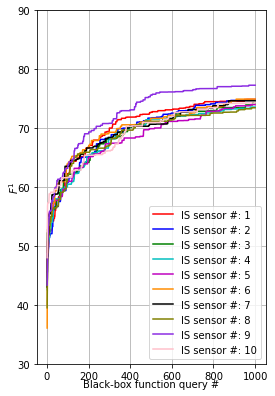

--------------------
TFT
--------------------
	LS7IS1_TFTperformance: 73.2871171617241 $\pm$ 1.2107326048103402
	LS7IS2_TFTperformance: 72.55646306384611 $\pm$ 2.668580932593335
	LS7IS3_TFTperformance: 74.02838087098019 $\pm$ 0.7738769074338702
	LS7IS4_TFTperformance: 73.16035138596612 $\pm$ 2.6601445884036967
	LS7IS5_TFTperformance: 74.27890582880522 $\pm$ 1.8141473422379655
	LS7IS6_TFTperformance: 73.23404762075347 $\pm$ 1.3277868667567871
	LS7IS7_TFTperformance: 76.36192497852468 $\pm$ 1.617384593368075
	LS7IS8_TFTperformance: 74.77594409298547 $\pm$ 0.8025068127336404
	LS7IS9_TFTperformance: 74.05832230941274 $\pm$ 1.469510436769325
	LS7IS10_TFTperformance: 75.882166774822 $\pm$ 1.131759050804225


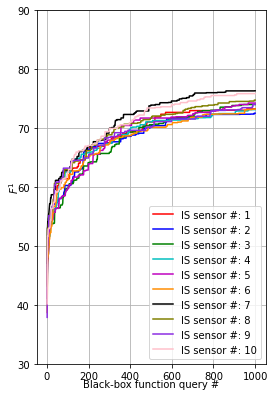

--------------------
TTT
--------------------
	LS7IS1_TTTperformance: 76.91970728983372 $\pm$ 1.2437611002383777
	LS7IS2_TTTperformance: 78.52132993607704 $\pm$ 1.2239298924372435
	LS7IS3_TTTperformance: 79.10473022830848 $\pm$ 1.9969899094473829
	LS7IS4_TTTperformance: 79.01748557562107 $\pm$ 2.1678990534676696
	LS7IS5_TTTperformance: 81.72041798024607 $\pm$ 0.7595101472846348
	LS7IS6_TTTperformance: 80.27022184646722 $\pm$ 2.3973555192492437
	LS7IS7_TTTperformance: 81.56795768571132 $\pm$ 1.1189010810175222
	LS7IS8_TTTperformance: 82.81646953990722 $\pm$ 1.3409195873233826
	LS7IS9_TTTperformance: 82.21907035236013 $\pm$ 0.972346505297241
	LS7IS10_TTTperformance: 82.70290196774751 $\pm$ 1.763090631523853


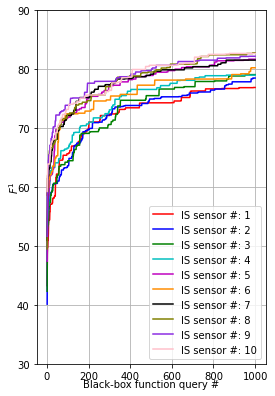

In [3]:
def calculate_datarange(e, gsn):
    if testbed == 'Testbed1/':
        placeHolders = []
        Xs = frange(e, 8, e)
        Ys = frange(e, 8, e)

        for x in Xs:
            for y in Ys:
                placeHolders.append([x, y])

    elif testbed == 'Testbed2/':
        placeHolders = []
        Xs = frange(e, 8, e)
        Ys = frange(e, 5.3, e)

        for x in Xs:
            for y in Ys:
                if x < 2 and y < 2:
                    continue
                else:
                    placeHolders.append([x, y])

    S = len(placeHolders)
    
    if gsn != -1:
        placed_sn = min(S, gsn)
    else:
        placed_sn = S
    print('places:', placed_sn)   
    dr = int((S * placed_sn) - ((placed_sn * (placed_sn + 1)) / 2))
    dr = min(dr, 1000)

    
    print(dr)
    return dr 


def frange(start, stop, step):
        steps = []
        while start < stop:
            steps.append(start)
            start +=step
        
        return steps

sensorNums = range(1, 11)
sensorTyps = ['TFF', 'TFT', 'TTT']

styles = [['', '-'],
           ['', ':'],
           ['', '-.'],
           ['o', '--'], 
           ['o', ':'],
           ['o', '-.']]
        
colors = ['r', 'b', 'g', 'c', 'm', 'darkorange', 'black', 'olive', 'blueviolet', 'pink']




for st in sensorTyps:
    print('-'*20)
    print(st)
    print('-'*20)
    BOnames = []
    fig, ax = plt.subplots(figsize=(4.1, 6.5))
    ax.set_ylim([30, 90])
    for index, sn in enumerate(sensorNums):
        dn2 = 'LS7IS' + str(sn) + '_' + st
        try:
            BO_Plotter(dn2, 
                        holdplot = True, 
                        plotDataPoints = False,
                        name = dn2, 
                        e = 1,
                        linestyle = styles[0][1], 
                        marker = styles[0][0],
                        fontsize = 10,
                        color = colors[index])

            BOnames.append('IS sensor #: ' + str(sn))
        except Exception as err:
            print('----- ', err)


    plt.grid()
    plt.legend(BOnames)
    plt.show()

NameError: name 'GA_Plotter_single' is not defined

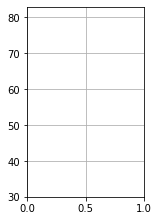

In [4]:
def calculate_moving_percentile(bo, baseline):
    counter = 0

    for index in range(len(bo)):
        if index == 0:
            if bo[index] > np.max(baseline[index]):
                counter += 1
            
        else:
            if bo[index] > np.max(baseline[0:index]):
                counter += 1

    
    return 100 * (counter / len(bo))


sensorNums = [5, 7, 9, 11, 13, 15]
epsilons = [0.25, 0.5, 1]

styles = [['', '--'],
           ['', ':'],
           ['', '-.'],
           ['o', '--'], 
           ['o', ':'],
           ['o', '-.']]
        
colors = ['r', 'b', 'g', 'c', 'm', 'darkorange']

for e in epsilons:
    if testbed == 'Testbed1/':
        if e == 0.25: 
            sn = 9
            gsn = -1
            
        elif e == 0.5:
            sn = 7
            gsn = -1
            
        elif e == 1:
            sn = 9
            gsn = 15
    elif testbed == 'Testbed2/':
        if e == 0.25: 
            sn = 11
            gsn = -1
            
        elif e == 0.5:
            sn = 11
            gsn = 7
            
        elif e == 1:
            sn = 13
            gsn = 11

    BOnames = ['GA']
    fig, ax = plt.subplots(figsize=(2.1, 3.5))
    ax.set_ylim([30, 83])
    plt.grid()
    
    dn1 = 'GA (' + str(e) + ')'
    ga_data = GA_Plotter_single(dn1, 
               plotDataPoints = False,
               linestyle = '-', 
               color = 'k',
               fontsize = 10,)
    
    
    dn2 = 'BO (' + str(sn) + '-' + str(e) + ')'
    
    if gsn != -1:
        dn3 = 'G (' + str(gsn) + '-' + str(e) + ')'
        
        dr = calculate_datarange(e, gsn)
        
        greedy_data = Greedy_Plotter_single(dn3, 
                holdplot = True, 
                plotDataPoints = False,
                name = dn3, 
                e = e,
                linestyle = '-', 
                marker = styles[0][0],
                color = 'b',
                data_range = dr,
                fontsize = 10)
    
    
    bo_data = BO_Plotter_best(dn2, 
            holdplot = True, 
            plotDataPoints = True,
            name = dn2, 
            e = e,
            linestyle = styles[0][1], 
            marker = styles[0][0],
            fontsize = 10,
            color = 'r')

    BOnames.append('BO ' + str(sn))

    from scipy import stats 

    
    print('GA is less than {} of the BOs observations.'.format(calculate_moving_percentile(bo_data, ga_data)))

    if gsn != -1:
        print('Greedy is less than {} of the BOs observations.'.format(calculate_moving_percentile(bo_data, greedy_data)))
        
    
        

    if gsn == -1:
        legend = plt.legend(['GA', 'BO ' + str(sn)],ncol=1, prop={'size': 10}, loc = 'lower right')
    else:
        legend = plt.legend(['GA', 'Greedy ' + str(gsn), 'BO ' + str(sn)],ncol=1, prop={'size': 10}, loc = 'lower right')
    
    # legend.get_frame().set_alpha(None)
    
    
    # legend.get_frame().set_facecolor((0, 0, 0, 0.1))
    
    # plt.grid()

    plt.show()
        



# Sensor Locations Animation

In [ ]:
def transparent_cmap(cmap, N=255):
    "Copy colormap and set alpha values"

    mycmap = cmap
    mycmap._init()
    
    def f(x):
        return np.clip(x**2,-1,1)
        # return x**2
    
    #mycmap._lut[:,-1] = np.linspace(0.7, 1, N+4)
    # mycmap._lut[:,-1] = np.logspace(0.0, 10, N+4, endpoint=False, base = np.e)

    
    mycmap._lut[:,-1] = np.linspace(0, 1, N + 4, endpoint=False)
    
    # mycmap._lut[:,-1] = np.linalg.norm(mycmap._lut[:,-1])
    # print(type(mycmap._lut[:,-1]))
    return mycmap


def HeatMap(data_x, data_y):
    mycmap = transparent_cmap(plt.cm.autumn)    
    heatmap, xedges, yedges = np.histogram2d(data_x, data_y, bins=100)
    extent = [0.2, 7.7, 0.6, 7.8]
    plt.imshow(heatmap.T, extent=extent, origin='lower', cmap = mycmap)
    
    # heatmap = heatmap, xedges, yedges = np.histogram2d(data_x, data_y, bins=[np.arange(0,400,5),np.arange(0,300,5)])
    # extent = [0.3, 8.2, 0.3, 8.2]
    # plt.imshow(heatmap.T, extent=extent, origin='lower', cmap = mycmap)
    
def HM(x1, x2):
  mycmap = transparent_cmap(plt.cm.autumn) 
  if testbed == 'Testbed1/':
    extent = [0.0, 8.0, 0.4, 8.0]

  elif testbed == 'Testbed2/':
    extent = [0.0, 5.2, 0.4, 8.0]

  from scipy.stats import gaussian_kde
  # plt.figure(figsize=(8, 10))

  # fit an array of size [Ndim, Nsamples]
  data = np.vstack([x1, x2])
  kde = gaussian_kde(data)

  # evaluate on a regular grid
  xgrid = np.linspace(min(x1), max(x1), 50);
  ygrid = np.linspace(min(x2), max(x2), 50);
  Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
  Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

  # Plot the result as an image
  plt.imshow(Z.reshape(Xgrid.shape),
            origin='lower', aspect='auto',
            extent=extent,
            cmap = mycmap)
  # cb = plt.colorbar()
  # cb.set_label("Occupants presence probability")

def get_sensor_locations(c, epsilon):
    import ast

    # THIS IS FOR (X, Y) CONFIGURATION SPACES
    coordinates = c.get_dictionary()
    
    Xs = []
    Ys = []
    Ts = []

    
    try:
        for i in range(1, int(len(coordinates.keys())/2) + 1):
            Xs.append(coordinates['x'+str(i)] * epsilon)
            Ys.append(coordinates['y'+str(i)] * epsilon)
        
    except:
        for key in coordinates.keys():
            # print(coordinates[key])
            try:
                loc = ast.literal_eval(coordinates[key])
                Xs.append(loc[0])
                Ys.append(loc[1])

                #TODO: Handle different sensor types here:
                Ts.append(1)
                
            except:
                continue


    for k in range(len(Xs)):
        for i in range(len(Xs)):
            for j in range(i+1, len(Xs)):
                if Xs[i] == Xs[j] and Ys[i] == Ys[j]:
                    Xs[i] -= 0.2
                    # print(Xs[i])

    for k in range(len(Xs)):
        for i in range(len(Xs)):
            for j in range(i+1, len(Xs)):
                if Xs[i] == Xs[j] and Ys[i] == Ys[j]:
                    Xs[i] -= 0.2
                    # print(Xs[i])
                        

    print(Xs)
    print(Ys)
    return Xs, Ys, Ts

    # THIS IS FOR X, Y, T_O CONFIGURATION SPACES
    '''
    # print(c)
    print(epsilon)
    coordinates = c.get_dictionary()

    Xs = []
    Ys = []
    Ts = []
    
    [str(item/255.) if item > 1 else 'r' for item in Ts]
    
    for key in coordinates.keys():
        if 'object' in key:
            Xs.append(float(coordinates[key].split(',')[0]))
            Ys.append(float(coordinates[key].split(',')[1]))
        
    for key in coordinates.keys():
        if 't_o' in key:
            Ts.append(coordinates[key])
        
    for key in coordinates.keys():
        if 'x' in key:
            Xs.append(coordinates[key])
            Ts.append(1)
        
    for key in coordinates.keys():
        if 'y' in key:
            Ys.append(coordinates[key])
    '''
    '''
        if 'x' in key:
            # print(coordinates[key])
            Xs.append(coordinates[key] / epsilon)
            
        elif 'y' in key:
            Ys.append(coordinates[key] / epsilon)

        elif 'object' in key:
            Xs.append(float(coordinates[key].split(',')[0]))
            Ys.append(float(coordinates[key].split(',')[1]))
            
        elif 't_' in key:
            Ts.append(coordinates[key])
            
    return Xs, Ys, Ts
    '''

def get_traces(directory):
    data = []
    for filename in os.listdir(directory):
        if filename.endswith(".csv"): 
            data.append(pd.read_csv(os.path.join(directory, filename)))

        else:
            continue

    data_x = []
    data_y = []

    for df in data:
        # data_x = data_x + list(np.clip(list(df.x), 0.5, 7.5))
        # data_y = data_y + list(np.clip(list(df.y), 0.5, 7.5))
        data_x = data_x + list(df.x)
        data_y = data_y + list(df.y)
        
    # print('X is: ', data_x)
    # print('Y is: ', data_y)
    
    return data_x, data_y

In [ ]:
def plot_sensor_locations(path, sensorNum, epsilon, method, filenumber):
    import SensorOptimizers.BayesianOptimization as bo
    import SensorOptimizers.GeneticAlgorithm as ga
    
    if method == 'BO':            
        results = boi.read_files(path + '/BO (' + 
                                 str(sensorNum) + 
                                 '-' + 
                                 str(epsilon) + ')')
        result = results[filenumber]
        data = [100 - p for p in result.perfs]
        title = 'BO performance: ' + str(max(data))
        
    elif method == 'G':
        results = boi.read_files(path + '/G (' + 
                                 str(sensorNum) + 
                                 '-' + 
                                 str(epsilon) + ')')
        
        best_result = -1
        best_index = -1
        result = results[filenumber]
        
        data = []
        sensor_num = []

        result_for_print = result

        for generation in result_for_print:
            for chromosome in generation:
                try:
                    data.append(chromosome[0][0])
                except:
                    pass
        # if (max(data) >= best_result):
        best_index = np.argmax(data)
        best_result = max(data)
        
        '''
        for index, result in enumerate(results):
        
            data = []
            sensor_num = []

            result_for_print = result

            for generation in result_for_print:
                for chromosome in generation:
                    try:
                        data.append(chromosome[0][0])
                    except:
                        pass
            if (max(data) > best_result):
                best_index = index
                best_result = max(data)
 
        '''
        # best_result = result
        title = 'Greedy performance: ' + str(best_result)
        
    elif method == 'GA':
        results = boi.read_files(path + '/GA (' + 
                                 str(epsilon) + 
                                 ')')
        best_result = -1
        best_index = -1
        result = results[filenumber]
        
        # for index, result in enumerate(results):
        
        data = []
        sensor_num = []

        result_for_print = result

        for generation in result_for_print:
            for chromosome in generation:
                try:
                    data.append(chromosome[0][0])
                except:
                    pass
        # if (max(data) >= best_result):
        best_index = np.argmax(data)
        best_result = max(data)

        title = 'GA performance: ' + str(best_result)
        
    configurations = []
    accuracy = []
    last = 0
    
    if method == 'BO':
        data = [100 - p for p in result.perfs]
        losses = list(data)
        n_calls = len(losses)
        maxs = [np.max(losses[:i]) for i in range(1, n_calls + 1)]

        for i in range(len(maxs)):
            if (maxs[i] != last):
                last = maxs[i]
                configurations.append(i)
                accuracy.append(maxs[i])

        configs = result.get_all_configs()
        i = -1
        config_index = configurations[-1]
        c = configs[config_index]
        
        # matrix, labels = bo.get_confusion_matrix(c)
        matrix, labels = [], []
        
        
        Xs, Ys, Ts = get_sensor_locations(c, epsilon)
        
        
    elif method == 'GA' or method == 'G':
        print(best_index)
        # result = results[best_index]
        _, configurations = result
        config = configurations[-1]
        # print(config)
        data = config.GetSensorLocations()[0]
        
        # matrix, labels = ga.get_confusion_matrix(config)
        matrix, labels = [], []
        
        A = [x for x in zip(*data)]  
        Xs, Ys = A[0], A[1]

    agent_x, agent_y = get_traces(testbed + "/Agent Trace Files ROS")
    #for i in range(len(Xs)):

    if testbed == 'Testbed1/':
        xlim=(-0.2, 8.2)
        ylim=(-0.3, 8.2)

    elif testbed == 'Testbed2/':
        xlim=(-0.2, 5.2)
        ylim=(-0.3, 8.2)

    if method == 'GA':
        plt.scatter(Xs, Ys, marker = 7, color='b')
        
    elif method == 'G':
        plt.scatter(Xs, Ys, marker = ">", color='g')

    elif method == 'BO':
        # colors = [str(item/255.) if item > 1 else 'r' for item in Ts]
        
        # plt.scatter([xx * epsilon for xx in Xs], [yy * epsilon for yy in Ys], marker = "^", color = 'r')
        plt.scatter(Xs, Ys, marker = "^", color = 'r')
        
        Cs = {3: 'b', 4: 'm', 5: 'k'}
        
        '''FOR DIFFERENT SENSOR TYPES
        
        for i in range(len(Xs)):
            if Ts[i] == 1:
                plt.scatter(Xs[i], Ys[i], marker = 6, color = 'r')
                
            else:
                print(Xs[i])
                print(Ys[i])
                plt.scatter(Xs[i], Ys[i], marker = "o", color = Cs[Ts[i]])
        '''    
        
        
        '''
        A = list([*zip(Xs, Ys)])
        print(type(A[0]))
        res = list(set([ele for ele in A if A.count(ele) > 1]))
        if len(res) > 0:
            for p in res:
                plt.scatter(p[1] + 0.15, p[0], marker = 6, color='r', label='_nolegend_')
        '''

    plt.xlim(*xlim)
    plt.ylim(*ylim)

    img = plt.imread(testbed + "/case study (IFC).png")
    if testbed == 'Testbed1/':
        im = plt.imshow(np.flipud(img), origin='upper', extent=[-0.2, 8.2, -0.2, 8.2])
        HM(agent_x, agent_y)
        ax.set_xlim([-0.22, 8.22])
        ax.set_ylim([-0.22, 8.22])

    if testbed == 'Testbed2/':
        im = plt.imshow(np.flipud(img), origin='upper', extent=[-0.2, 5.5, -0.2, 8.2])
        HM(agent_x, agent_y)
        ax.set_xlim([-0.22, 5.42])
        ax.set_ylim([-0.22, 8.22])
        ax.set_xticks(range(0, 6))
        ax.set_yticks(range(0, 9))
    
    plt.gca().invert_yaxis()

    # display.clear_output(wait=True)
    # display.display(pl.gcf())
    return title, matrix, labels

In [ ]:
# from turtle import position


for epsilon in [0.25, 0.5, 1]:
    print('*' * 100)
    print('epsilon: ' + str(epsilon))
    print('*' * 100)

    if testbed == 'Testbed1/':
         
        if epsilon == 0.25:
            sensorNumG = -1
            sensorNum = 9
            
            filenumberGA = 0
            filenumber1G = 1
            filenumber1 = 1
            
        
        elif epsilon == 0.5:
            sensorNumG = -1
            sensorNum = 7
            
            filenumberGA = 0
            filenumber1G = 0
            filenumber1 = 1
            
        
        elif epsilon == 1:
            sensorNumG = 15
            sensorNum = 9
            
            filenumberGA = 2
            filenumber1G = 3
            filenumber1 = 0
       
        
    elif testbed == 'Testbed2/':
        
        if epsilon == 0.25:
            sensorNumG = -1
            sensorNum = 11
            
            filenumberGA = 1
            filenumber1G = 1
            filenumber1 = 2
        
        elif epsilon == 0.5:
            sensorNumG = 7
            sensorNum = 11
            
            filenumberGA = 0
            filenumber1G = 3
            filenumber1 = 4
        ####################################    
        elif epsilon == 1:
            sensorNumG = 11
            sensorNum = 13
            
            filenumberGA = 2
            filenumber1G = 3
            filenumber1 = 4
        ####################################
    import matplotlib.pyplot as plt

    if testbed == 'Testbed1/':
        fig, ax = plt.subplots(figsize=(5.0, 5.0), dpi=80)
        

    elif testbed == 'Testbed2/':
        fig, ax = plt.subplots(figsize=(3.2, 5.0), dpi=80)

    
    title, matrix, labels = plot_sensor_locations(results_directory, sensorNum, epsilon, 'BO', filenumber1)
    bo_title = title
    bo_matrix = matrix
    bo_labels = labels

    title, matrix, labels = plot_sensor_locations(results_directory, sensorNum, epsilon, 'GA', filenumberGA)
    ga_title = title
    ga_matrix = matrix
    ga_labels = labels
    
    if sensorNumG != -1:
        title, matrix, labels = plot_sensor_locations(results_directory, sensorNumG, epsilon, 'G', filenumber1G)
        ga_title = title
        ga_matrix = matrix
        ga_labels = labels
    

    # legend = plt.legend(['BO sensor locations', 'GA sensor locations', 'Greedy sensor locations'], ncol = 3, prop={'size': 10}, loc = 'center left', handlelength = 1.5, bbox_to_anchor=(1, 0.5))
    # legend.get_frame().set_alpha(None)
    # legend.get_frame().set_facecolor((0, 0, 0, 0.1))

    print(ga_title + " : " + bo_title)
    plt.show()
    

# Statistics

In [ ]:


statistic = pd.DataFrame()
pvalue = pd.DataFrame()

def compare(data, minVal, maxVal = None): 
  data_compare = pd.DataFrame()

  for i1, v1 in pvalue.items():
    for i2, v2 in pvalue.items():
      if maxVal == None:
        if data.loc[i1,i2] < minVal:
          data_compare.loc[i1,i2] = True
        else:
          data_compare.loc[i1,i2] = False

      if maxVal != None:
        if data.loc[i1,i2] < minVal or data.loc[i1,i2] > maxVal:
          data_compare.loc[i1,i2] = True
        else:
          data_compare.loc[i1,i2] = False
  return data_compare


mean_std = pd.DataFrame()
for key1 in accuracies:
    for key2 in accuracies:
        
        # print(np.std(accuracies[key1]))
        # print(np.mean(accuracies[key1]))
        
        mean_std.loc[key1, 'Mean'] = np.mean(accuracies[key1])
        mean_std.loc[key1, 'STD'] = np.std(accuracies[key1])
                                             
        
        t = ttest_ind_from_stats(mean1=np.mean(accuracies[key1]), std1=np.std(accuracies[key1]), nobs1=5,
                                 mean2=np.mean(accuracies[key2]), std2=np.std(accuracies[key2]), nobs2=5)
        
        statistic.loc[key1,key2] = t.statistic
        pvalue.loc[key1,key2] = t.pvalue
        

In [ ]:
pvalue

In [ ]:
compare_pvalue = compare(pvalue, 0.05)

print(compare_pvalue)